## Minimum Free Energy Plot

"The minimum free energy (MFE) of ribonucleic acids (RNAs) increases at an apparent linear rate with sequence length. Simple indices, obtained by dividing the MFE by the number of nucleotides, have been used for a direct comparison of the folding stability of RNAs of various sizes" ([Edoardo Trotta](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4236180/#:~:text=The%20minimum%20free%20energy%20(MFE,of%20RNAs%20of%20various%20sizes)) \).
In this graph, we are comparing the MFE of miRNA seeds present in the zebrafish genome. We hypothesize we will see a uniform distribution of MFE among the miRNA seeds, which would indicate external evolutionary forces acting on the zebrafish genome. 

To gather the data of all 16384 possible 7mer seeds, we first must create a .csv, which we obtain by flattening our 7mer map:

In [2]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
from collections import Counter
from matplotlib.colors import SymLogNorm, LogNorm

In [26]:
def print_map(filename, map_):
    df=pd.DataFrame(map_)
    df.to_csv(filename+'.csv', index= False, header = False)

In [5]:
df = pd.read_csv("AGTC-7seq.csv", header = None)
data_arr = np.array(df).flatten()
print_map("7seq list", data_arr)

In order to obtain the seed matches for each sequence, we transfer the .csv data into a .txt. This allows us to output the seed matches in "7seq match list', which we then transfer back into the .csv. 

In [7]:
from numpy import loadtxt
import pandas as pd
def reverse_compliment(filename):
    #import file
    filename_data = loadtxt(filename+".txt", comments=">", delimiter="\z",dtype="str")


    #Replace A with X
    filename_data = [sub.replace('A', 'X') for sub in filename_data]
    
    #Replace T with A
    filename_data = [sub.replace('T', 'A') for sub in filename_data]
    
    #Replace X with T
    filename_data = [sub.replace('X', 'T') for sub in filename_data]
    
    #Replace C with X
    filename_data = [sub.replace('C', 'X') for sub in filename_data]
    
    #Replace G with C
    filename_data = [sub.replace('G', 'C') for sub in filename_data]
    
    #Replace X with G
    filename_data = [sub.replace('X', 'G') for sub in filename_data]
    
    #Reverse all the strings
    filename_data_reverse = [sub[::-1] for sub in filename_data]
    
    return filename_data_reverse

def print_text(filename, arr):
    with open(filename+".txt", "w+") as file:
        for item in arr:
            file.write("%s\n" % item)
    file.close()

print_text("7seq match list", reverse_compliment("7seq"))

We will be using RNAcofold from the ViennaRNA software to compute the MFE of each pair. Because of this, certain formatting is needed, specifically, we place an '&' character between each seed and corresponding match. Once that is complete, we transfer our data into data.txt to be processed by RNAcofold. 

_________________________________________________
#### A quick interjection about ViennaRNA:

I pretty much hated the ViennaRNA documentation. I get that the people providing the software probably have better things to do then tell some randos how to use their software, but I dont have better things to do, so here was my process of downloading it: ViennaRNA has software available for Windows and Mac, but its essentially useless to compute the large amount of data we need.  Instead, I reccomend installing wsl [here](https://docs.microsoft.com/en-us/windows/wsl/install) in order to use linux on your machine. Then, download ViennaRNA [here](https://www.tbi.univie.ac.at/RNA/index.html) and install whatever packages needed using apk-get. (If you have trouble directing to the directory in the ubuntu machine, use [this](https://askubuntu.com/questions/759880/where-is-the-ubuntu-file-system-root-directory-in-windows-subsystem-for-linux-an) link to cd to the download folder). Finally, follow install instructions [here](https://www.tbi.univie.ac.at/RNA/documentation.html). 
___________________________________________________

Once ViennaRNA has been properly configured, place data.txt in folder and run this command in the ubuntu terminal:

                $RNAcofold --output-format D --csv-delim $'\t' <data.txt> data_out.txt
                
I transfered the data_out.txt to a .csv, which tabulated everything automatically. "MFE Data.csv" contains the 7mer seeds, corresponding seed matches, and the calculated MFEs. I then used that data to produce these plots:

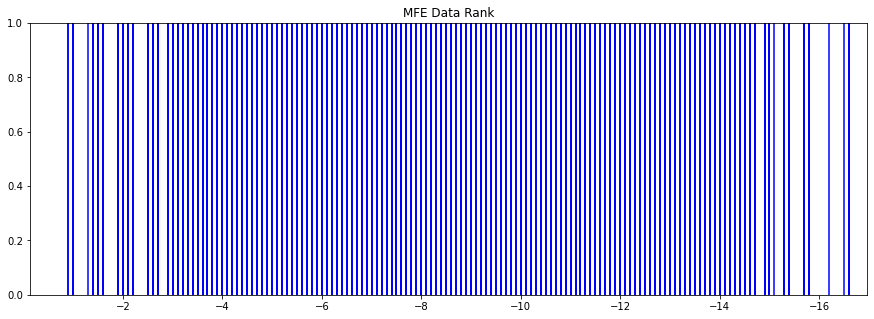

In [18]:
def make_rank_plot(filename):
    #import the zebrafish dictionary
    df = pd.read_csv(filename + ".csv")

    plt.figure(figsize=(15, 5))
    ax = plt.gca()
    ax.invert_xaxis()

    for ind in df.index:
        plt.axvline(x=df['MFE'][ind], color = 'b' )
        
    plt.title(filename+" Rank")
    plt.savefig(filename+" Rank")
    plt.show()
    

make_rank_plot("MFE Data")

Now to highlight the mature seeds:

In [11]:
from numpy import loadtxt
import pandas as pd
def getSeed(filename, x1, x2):
    #import file
    filename_data = loadtxt(filename+".txt", comments=">", delimiter="\z",dtype="str")
    
    #substring from x1, x2
    filename_data = [sub[x1:x2] for sub in filename_data]

    return filename_data

def print_text(filename, arr):
    with open(filename+".txt", "w+") as file:
        for item in arr:
            file.write("%s\n" % item)
    file.close()

print_text("dre_mature_seeds", getSeed("dre_mature", 1,8))

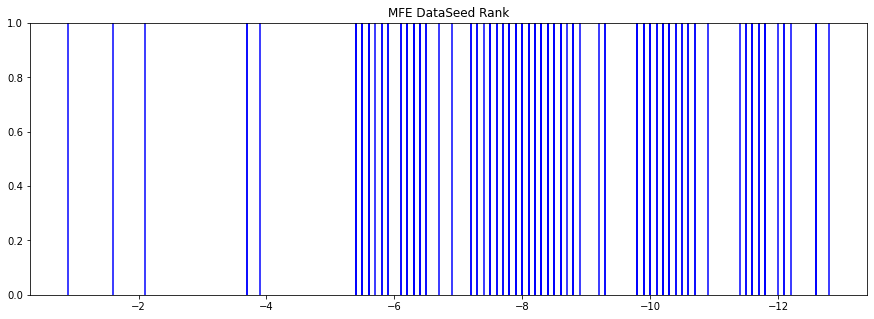

In [20]:
def make_seed_rank_plot(filename):
    
    filename_data = loadtxt("dre_mature_seeds"+".txt", comments=">", delimiter="\z",dtype="str")
    
    seed_list = [sub.replace('U', 'T') for sub in filename_data]
    
    #import the zebrafish dictionary
    df = pd.read_csv(filename + ".csv")

    plt.figure(figsize=(15, 5))
    ax = plt.gca()
    ax.invert_xaxis()

    for ind in df.index:
        if(df['Seed'][ind] in seed_list):
            plt.axvline(x=df['MFE'][ind], color = 'b')
        
    plt.title(filename+"Seed Rank")
    plt.savefig(filename+"Seed Rank")
    plt.show()
    
make_seed_rank_plot("MFE Data")

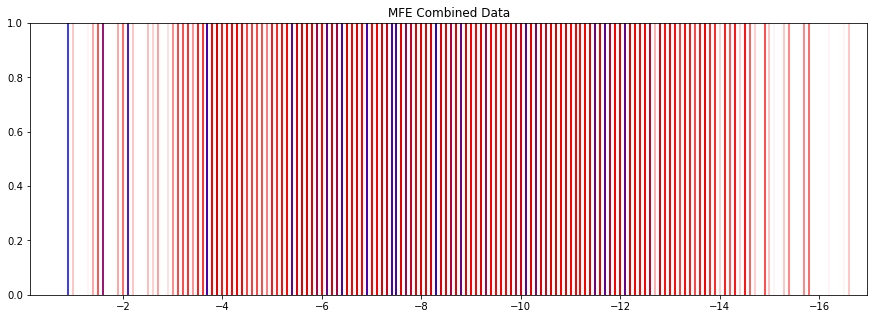

In [24]:
def make_highlight_plot(filename):
    
    filename_data = loadtxt("dre_mature_seeds"+".txt", comments=">", delimiter="\z",dtype="str")
    
    seed_list = [sub.replace('U', 'T') for sub in filename_data]
    
    #import the zebrafish dictionary
    df = pd.read_csv(filename + ".csv")

    plt.figure(figsize=(15, 5))
    ax = plt.gca()
    ax.invert_xaxis()

    for ind in df.index:
        if(df['Seed'][ind] in seed_list):
            plt.axvline(x=df['MFE'][ind], color = 'b' )
        else:
            plt.axvline(x=df['MFE'][ind], color = 'r',alpha=.05 )
        
    plt.title("MFE Combined Data")
    plt.savefig("MFE Combined Data")
    plt.show()
    
make_highlight_plot("MFE Data")

### Seed Abundance plots
The code below takes the seed abundance data from the Bar Ranked Plot project and transfers the data into a .txt. This information is present in columns D and E in "MFE Data". 

In [164]:
def print_seed_abundance(filename1):
    arr = []
    
    seed_abundance_dict = get_dict("Seed Abundance")
    
    df_mfe = pd.read_csv(filename1 + ".csv")

    for ind in df_mfe.index:
        if(df_mfe['Seed'][ind] in seed_abundance_dict):
            arr.append(seed_abundance_dict[df_mfe['Seed'][ind]])
        else:
            arr.append(0)
       
    print_text("seed abundance", arr)
    
    
def print_match_abundance(filename1):
    arr = []
    seed_match_dict = get_dict("Seed Match Abundance")
    
    df_mfe = pd.read_csv(filename1 + ".csv")

    for ind in df_mfe.index:
        if(df_mfe['Seed Match'][ind] in seed_match_dict):
            arr.append(seed_match_dict[df_mfe['Seed Match'][ind]])
        else:
            arr.append(0)
       
    print_text("seed match abundance", arr)
    
    
print_seed_abundance("MFE Data")
print_match_abundance("MFE Data")

In [212]:
import csv
from numpy import loadtxt
def get_dict(filename):
    dict_from_csv = {}

    with open(filename+'.csv', mode='r') as inp:
        reader = csv.reader(inp)
        dict_from_csv = {rows[0]:rows[1] for rows in reader}
    return dict_from_csv

def normalize_dict(d):
    
    _max = 0
    for i in d.values():
        if(float(i)>_max):
            _max = float(i)      
    _min = 1
    for i in d.values():
        if(float(i)<_min):
            _min = float(i)
    for k in d:
        d[k] = (float(d[k])-_min)/(_max-_min)
        
    return d

def sigmoid(x):
        e = np.exp(1)
        y = 1/(1+e**(-x))
        return y

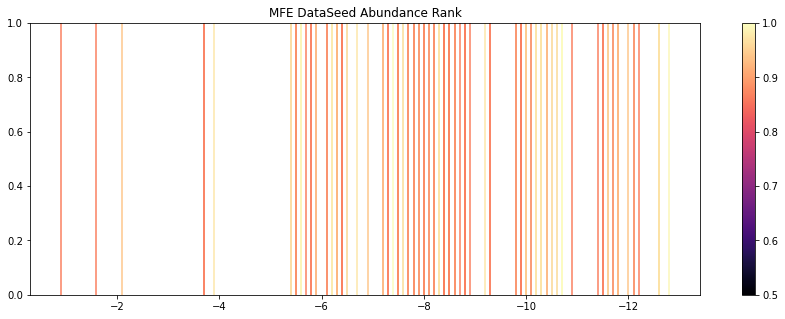

In [221]:
def make_seed_abundance_rank_plot(filename1):
    #import the zebrafish dictionary
    df_mfe = pd.read_csv(filename1 + ".csv")
   
    plt.figure(figsize=(15, 5))
    ax = plt.gca()
    ax.invert_xaxis()
    
    #creating colormap
    cmap = mpl.cm.get_cmap('magma')
    
   
    df_mfe['Seed Abundance'] = sigmoid(df_mfe['Seed Abundance'])
    
    seed_dict = get_dict("Seed Abundance")
    

    for ind in df_mfe.index:
        if(df_mfe['Seed'][ind] in seed_dict):
            plt.axvline(x=df_mfe['MFE'][ind], color = cmap(df_mfe['Seed Abundance'][ind]))
            
    norm = mpl.colors.Normalize(vmin=df_mfe['Seed Abundance'].min(), vmax=df_mfe['Seed Abundance'].max())
    sm = plt.cm.ScalarMappable(cmap=cmap, norm = norm)
    plt.colorbar(sm)


    plt.title(filename1+" Seed Abundance Rank")
    plt.savefig(filename1+" Seed Abundance Rank")
    plt.show()
    
make_seed_abundance_rank_plot("MFE Data")

In [1]:
def make_seed_match_abundance_rank_plot(filename1):
    #import the zebrafish dictionary
    df_mfe = pd.read_csv(filename1 + ".csv")
   
    plt.figure(figsize=(15, 5))
    ax = plt.gca()
    ax.invert_xaxis()
    
    #creating colormap
    cmap = mpl.cm.get_cmap('magma')
    
    df_mfe['Seed Match Abundance'] = sigmoid(df_mfe['Seed Match Abundance'])
    seed_match_dict = get_dict("Seed Match Abundance")

    for ind in df_mfe.index:
        if(df_mfe['Seed'][ind] in seed_match_dict):
            plt.axvline(x=df_mfe['MFE'][ind], color = cmap(df_mfe['Seed Match Abundance'][ind]))
            
    norm = mpl.colors.Normalize(vmin=df_mfe['Seed Match Abundance'].min(), vmax=df_mfe['Seed Match Abundance'].max())
    sm = plt.cm.ScalarMappable(cmap=cmap, norm = norm)
    plt.colorbar(sm)


    plt.title(filename1+" Seed Match Abundance Rank")
    plt.savefig(filename1+" Seed Match Abundance Rank")
    plt.show()
    
make_seed_match_abundance_rank_plot("MFE Data")

NameError: name 'pd' is not defined

### MFE Abundance Plots

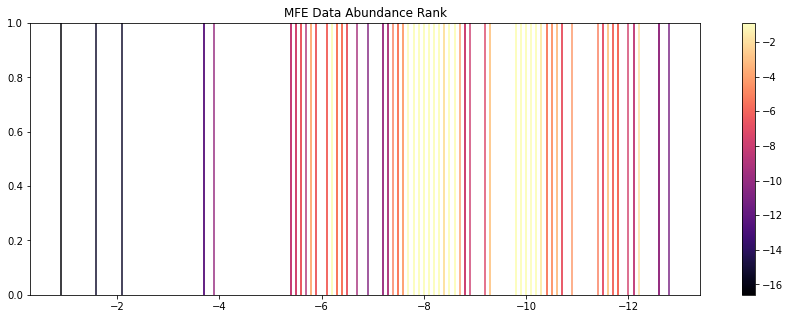

In [196]:
def make_abundance_plot(filename1):
    #import the zebrafish dictionary
    df_mfe = pd.read_csv(filename1 + ".csv")
    
    mfe_dict = Counter(df_mfe['MFE'])

    plt.figure(figsize=(15, 5))
    ax = plt.gca()
    ax.invert_xaxis()
    
    #creating colormap
    cmap = mpl.cm.get_cmap('magma')

    for ind in df_mfe.index:
        if(df_mfe['Seed Match Abundance'][ind] != 0):
            plt.axvline(x=df_mfe['MFE'][ind], color = cmap(mfe_dict[df_mfe['MFE'][ind]]))
            
    norm = mpl.colors.Normalize(vmin=df_mfe['MFE'].min(), vmax=df_mfe['MFE'].max())
    sm = plt.cm.ScalarMappable(cmap=cmap, norm = norm)
    plt.colorbar(sm)


    plt.title(filename1+" Abundance Rank")
    plt.savefig(filename1+" Abundance Rank")
    plt.show()
    
make_abundance_plot("MFE Data")